In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from networkFunctions import *
from plotFunctions import *

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 100
numMsg = 1000
myseed = 32
maxEpochs = 10000
msgCost = costFactor*msgUtility

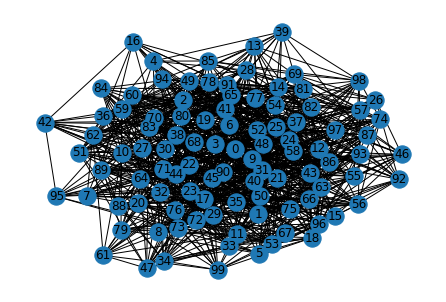

In [3]:
G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
myPos = nx.spring_layout(G, seed = 40)
nx.draw(G, pos=myPos, with_labels=True)

In [4]:
prevStates = []
maxEpochs = 1
commonAttrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}

attr = "type"
# attrRange = np.arange(5*msgCost, 50*msgCost, 5)
attrRange = ["Utilitarian","Deontology", "Virtue", "Transcendence (0.3)"]
outcomeNetwork = {}
# type = "Deontology"

for val in attrRange:
    if attr == "type":
        type = val
    else:
        commonAttrs[attr] = val
    initGraph(G, numNodes, commonAttrs, type = type)
    e = 0
    while e<maxEpochs:
        e+=1
        msgList = createMsgs(numMsg, numNodes, G)  #Message list creation
        prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
        nf, nd = transmitMsgs(msgList, G)
        for i in range(numNodes) : G.nodes[i]['agent'].epochUpdate()
        curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
        if np.count_nonzero(curStable) == numNodes:
            break
    outcomeNetwork[val] = copy.deepcopy(G)

In [5]:
outcomeNetwork

{'Utilitarian': <networkx.classes.graph.Graph at 0x21eaa77c220>,
 'Deontology': <networkx.classes.graph.Graph at 0x21ea832fdf0>,
 'Virtue': <networkx.classes.graph.Graph at 0x21eaa77cd30>,
 'Transcendence (0.3)': <networkx.classes.graph.Graph at 0x21eaa7d9180>}

In [6]:
print([getNetworkProp(outcomeNetwork[val], 'burnout') for val in outcomeNetwork])

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

[92.0, 71.6, 84.6, 88.2]


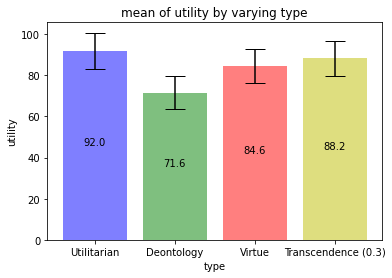

In [7]:
utility_list = plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar", metric="mean")
print(utility_list)

[19.6, 18.58, 19.23, 19.41]


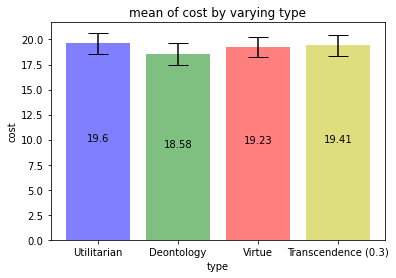

In [8]:
costList = plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar", metric="mean")
print(costList)

[40, 32, 36, 39]


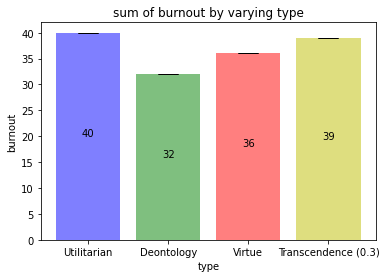

In [9]:
burnoutList = plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar", metric="sum")
print(burnoutList)

[9.6, 8.58, 9.23, 9.41]


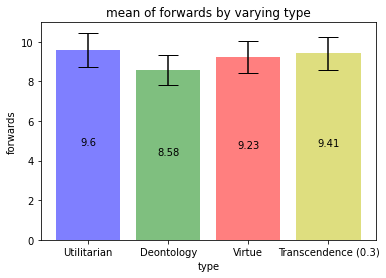

In [10]:
forwardsList = plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar", metric="mean")
print(forwardsList)

[0.4, 1.42, 0.77, 0.59]


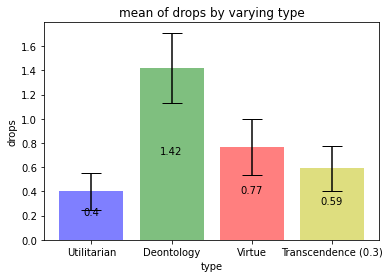

In [11]:
dropsList = plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar", metric="mean")
print(dropsList)

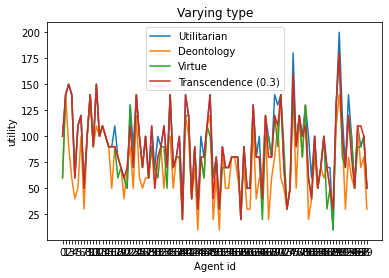

In [12]:
plotAgentWiseVaryParams(outcomeNetwork, "utility", attr, plotType="line")

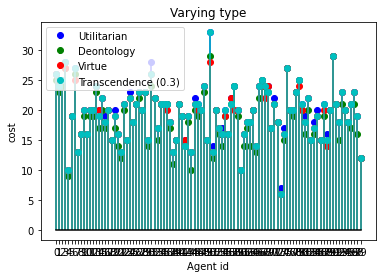

In [13]:
plotAgentWiseVaryParams(outcomeNetwork, "cost", attr, plotType="stem")

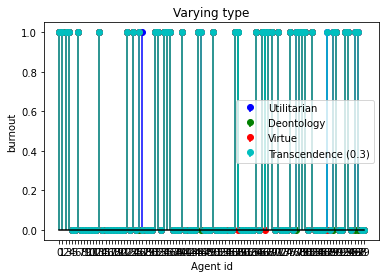

In [14]:
plotAgentWiseVaryParams(outcomeNetwork, "burnout", attr, plotType="stem")

[9200, 7160, 8460, 8820]

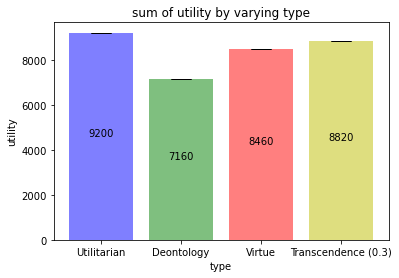

In [15]:
plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar")

[1960.0, 1858.0, 1923.0, 1941.0]

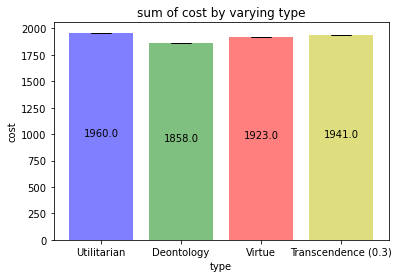

In [16]:
plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar")

[40, 32, 36, 39]

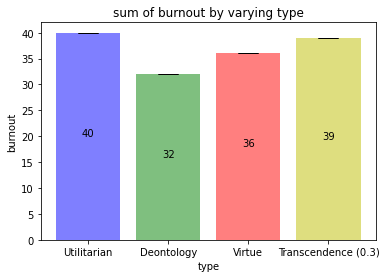

In [17]:
plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar")

[960, 858, 923, 941]

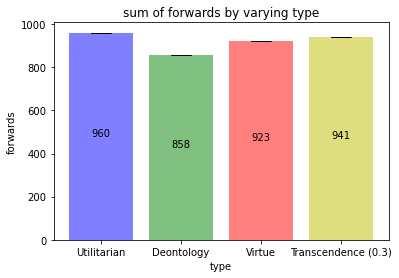

In [18]:
plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar")

[40, 142, 77, 59]

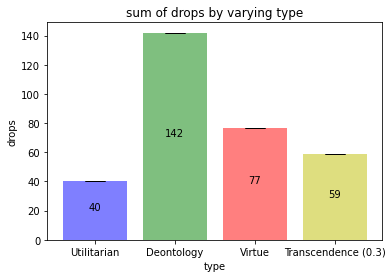

In [19]:
plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar")

In [20]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

1
20.0


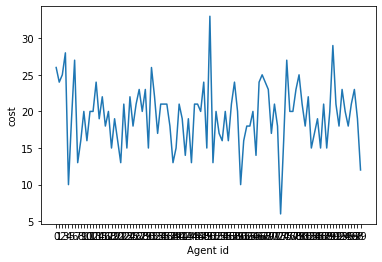

In [21]:
plotAgentwiseProp(G, "cost")

In [22]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

Not applicable property


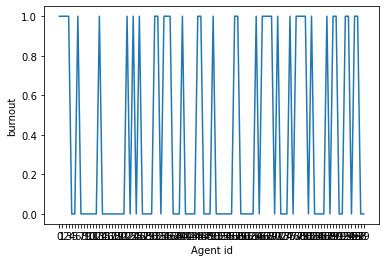

In [23]:
plotAgentwiseProp(G, "burnout")

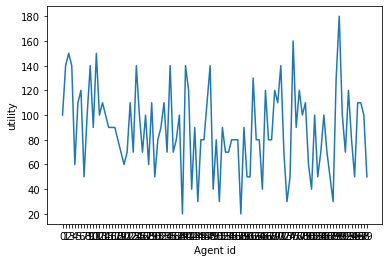

In [24]:
plotAgentwiseProp(G, "utility")